# Test De-Noising Model Implementation (to be deleted)

Since no DL image can be created now (noise need to be further analyzed), we try the denoising model with the real CT images.

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-40GB'

In [23]:
from torchvision.io import read_image

b = read_image('to_delete/train/image_0.png').to('cuda')

In [5]:
from models.dncnn.model import DnCNN

model = DnCNN().to(torch.device('cuda'))

# Count the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of parameters:", num_params)

Number of parameters: 557057


In [4]:
from torchmetrics.image import StructuralSimilarityIndexMeasure

ssim_calculator = StructuralSimilarityIndexMeasure(data_range=255).to('cuda')

In [3]:
# Check currently allocated memory
allocated_memory = torch.cuda.memory_allocated()
print("Currently allocated GPU memory:", allocated_memory / 1024**3, "GB")

# Check peak memory usage
peak_memory = torch.cuda.max_memory_allocated()
print("Peak GPU memory usage:", peak_memory / 1024**3, "GB")

Currently allocated GPU memory: 0.016304492950439453 GB
Peak GPU memory usage: 35.16315746307373 GB


## Model

In [1]:
import os
import torch
import numpy as np

from utils import load_data

from models.cnn_trainer import CnnTrainer
from models.cnn_viewer import CnnViewer
from models.noises import gaussian, pixel_intensity_adaptive

%load_ext autoreload
%autoreload 2

loaded_stat_analysis = np.load('data_stats_analysis/ct_stat_results.npz', allow_pickle=True)
var_dict = loaded_stat_analysis['noise_var_dict'].item()

## Data

Create a folder to be deleted to have png images to  test our model. Already created.

Define model parameters

Start Training DnCNN model :
Epoch 1/20...


Progress of training epoch 1: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 1: 3it [00:00,  4.10it/s]                       


Train average metrics: 
	loss (MSE)=1.62e+01, PSNR=3.61e+01, SSIM=8.33e-01
Validation average metrics:
	loss (MSE)=2.11e+01, PSNR=3.50e+01, SSIM=8.21e-01
learning rate=1.99e-03
Epoch 2/20...


Progress of training epoch 2: 12it [00:07,  1.56it/s]                        
Progress of validation metrics epoch 2: 3it [00:00,  4.35it/s]                       


Train average metrics: 
	loss (MSE)=1.59e+01, PSNR=3.62e+01, SSIM=8.37e-01
Validation average metrics:
	loss (MSE)=1.67e+01, PSNR=3.60e+01, SSIM=8.26e-01
learning rate=1.97e-03
Epoch 3/20...


Progress of training epoch 3: 12it [00:07,  1.59it/s]                        
Progress of validation metrics epoch 3: 3it [00:00,  4.21it/s]                       


Train average metrics: 
	loss (MSE)=1.58e+01, PSNR=3.62e+01, SSIM=8.38e-01
Validation average metrics:
	loss (MSE)=1.63e+01, PSNR=3.61e+01, SSIM=8.35e-01
learning rate=1.91e-03
Epoch 4/20...


Progress of training epoch 4: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 4: 3it [00:00,  4.27it/s]                       


Train average metrics: 
	loss (MSE)=1.57e+01, PSNR=3.62e+01, SSIM=8.40e-01
Validation average metrics:
	loss (MSE)=1.64e+01, PSNR=3.60e+01, SSIM=8.12e-01
learning rate=1.83e-03
Epoch 5/20...


Progress of training epoch 5: 12it [00:07,  1.56it/s]                        
Progress of validation metrics epoch 5: 3it [00:00,  3.89it/s]                       


Train average metrics: 
	loss (MSE)=1.54e+01, PSNR=3.63e+01, SSIM=8.44e-01
Validation average metrics:
	loss (MSE)=1.62e+01, PSNR=3.61e+01, SSIM=8.35e-01
learning rate=1.72e-03
Epoch 6/20...


Progress of training epoch 6: 12it [00:07,  1.56it/s]                        
Progress of validation metrics epoch 6: 3it [00:00,  4.17it/s]                       


Train average metrics: 
	loss (MSE)=1.48e+01, PSNR=3.65e+01, SSIM=8.49e-01
Validation average metrics:
	loss (MSE)=1.63e+01, PSNR=3.60e+01, SSIM=8.27e-01
learning rate=1.60e-03
Epoch 7/20...


Progress of training epoch 7: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 7: 3it [00:00,  4.26it/s]                       


Train average metrics: 
	loss (MSE)=1.37e+01, PSNR=3.68e+01, SSIM=8.60e-01
Validation average metrics:
	loss (MSE)=1.53e+01, PSNR=3.63e+01, SSIM=8.38e-01
learning rate=1.46e-03
Epoch 8/20...


Progress of training epoch 8: 12it [00:07,  1.57it/s]                        
Progress of validation metrics epoch 8: 3it [00:00,  4.11it/s]                       


Train average metrics: 
	loss (MSE)=1.22e+01, PSNR=3.74e+01, SSIM=8.75e-01
Validation average metrics:
	loss (MSE)=1.35e+01, PSNR=3.69e+01, SSIM=8.49e-01
learning rate=1.30e-03
Epoch 9/20...


Progress of training epoch 9: 12it [00:07,  1.56it/s]                        
Progress of validation metrics epoch 9: 3it [00:00,  4.29it/s]                       


Train average metrics: 
	loss (MSE)=1.01e+01, PSNR=3.84e+01, SSIM=8.95e-01
Validation average metrics:
	loss (MSE)=1.17e+01, PSNR=3.76e+01, SSIM=8.64e-01
learning rate=1.14e-03
Epoch 10/20...


Progress of training epoch 10: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 10: 3it [00:00,  4.22it/s]                       


Train average metrics: 
	loss (MSE)=7.79e+00, PSNR=3.95e+01, SSIM=9.18e-01
Validation average metrics:
	loss (MSE)=8.86e+00, PSNR=3.88e+01, SSIM=9.00e-01
learning rate=9.72e-04
Epoch 11/20...


Progress of training epoch 11: 12it [00:07,  1.60it/s]                        
Progress of validation metrics epoch 11: 3it [00:00,  4.22it/s]                       


Train average metrics: 
	loss (MSE)=5.95e+00, PSNR=4.07e+01, SSIM=9.35e-01
Validation average metrics:
	loss (MSE)=7.35e+00, PSNR=3.96e+01, SSIM=9.11e-01
learning rate=8.06e-04
Epoch 12/20...


Progress of training epoch 12: 12it [00:07,  1.57it/s]                        
Progress of validation metrics epoch 12: 3it [00:00,  4.24it/s]                       


Train average metrics: 
	loss (MSE)=4.64e+00, PSNR=4.18e+01, SSIM=9.50e-01
Validation average metrics:
	loss (MSE)=4.96e+00, PSNR=4.13e+01, SSIM=9.45e-01
learning rate=6.45e-04
Epoch 13/20...


Progress of training epoch 13: 12it [00:07,  1.60it/s]                        
Progress of validation metrics epoch 13: 3it [00:00,  4.20it/s]                       


Train average metrics: 
	loss (MSE)=4.12e+00, PSNR=4.23e+01, SSIM=9.55e-01
Validation average metrics:
	loss (MSE)=4.41e+00, PSNR=4.19e+01, SSIM=9.51e-01
learning rate=4.95e-04
Epoch 14/20...


Progress of training epoch 14: 12it [00:07,  1.59it/s]                        
Progress of validation metrics epoch 14: 3it [00:00,  4.23it/s]                       


Train average metrics: 
	loss (MSE)=3.92e+00, PSNR=4.25e+01, SSIM=9.57e-01
Validation average metrics:
	loss (MSE)=4.09e+00, PSNR=4.22e+01, SSIM=9.56e-01
learning rate=3.58e-04
Epoch 15/20...


Progress of training epoch 15: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 15: 3it [00:00,  4.22it/s]                       


Train average metrics: 
	loss (MSE)=3.79e+00, PSNR=4.26e+01, SSIM=9.58e-01
Validation average metrics:
	loss (MSE)=3.99e+00, PSNR=4.23e+01, SSIM=9.57e-01
learning rate=2.39e-04
Epoch 16/20...


Progress of training epoch 16: 12it [00:07,  1.59it/s]                        
Progress of validation metrics epoch 16: 3it [00:00,  4.28it/s]                       


Train average metrics: 
	loss (MSE)=3.73e+00, PSNR=4.27e+01, SSIM=9.59e-01
Validation average metrics:
	loss (MSE)=3.93e+00, PSNR=4.24e+01, SSIM=9.58e-01
learning rate=1.42e-04
Epoch 17/20...


Progress of training epoch 17: 12it [00:07,  1.59it/s]                        
Progress of validation metrics epoch 17: 3it [00:00,  4.35it/s]                       


Train average metrics: 
	loss (MSE)=3.69e+00, PSNR=4.27e+01, SSIM=9.59e-01
Validation average metrics:
	loss (MSE)=3.91e+00, PSNR=4.24e+01, SSIM=9.58e-01
learning rate=6.88e-05
Epoch 18/20...


Progress of training epoch 18: 12it [00:07,  1.57it/s]                        
Progress of validation metrics epoch 18: 3it [00:00,  4.06it/s]                       


Train average metrics: 
	loss (MSE)=3.68e+00, PSNR=4.28e+01, SSIM=9.59e-01
Validation average metrics:
	loss (MSE)=3.90e+00, PSNR=4.25e+01, SSIM=9.58e-01
learning rate=2.16e-05
Epoch 19/20...


Progress of training epoch 19: 12it [00:07,  1.57it/s]                        
Progress of validation metrics epoch 19: 3it [00:00,  4.23it/s]                       


Train average metrics: 
	loss (MSE)=3.67e+00, PSNR=4.28e+01, SSIM=9.60e-01
Validation average metrics:
	loss (MSE)=3.90e+00, PSNR=4.25e+01, SSIM=9.58e-01
learning rate=1.77e-06
Epoch 20/20...


Progress of training epoch 20: 12it [00:07,  1.58it/s]                        
Progress of validation metrics epoch 20: 3it [00:00,  4.31it/s]                       


Train average metrics: 
	loss (MSE)=3.67e+00, PSNR=4.28e+01, SSIM=9.60e-01
Validation average metrics:
	loss (MSE)=3.90e+00, PSNR=4.25e+01, SSIM=9.58e-01
learning rate=9.94e-06
Finish Training DnCNN model !


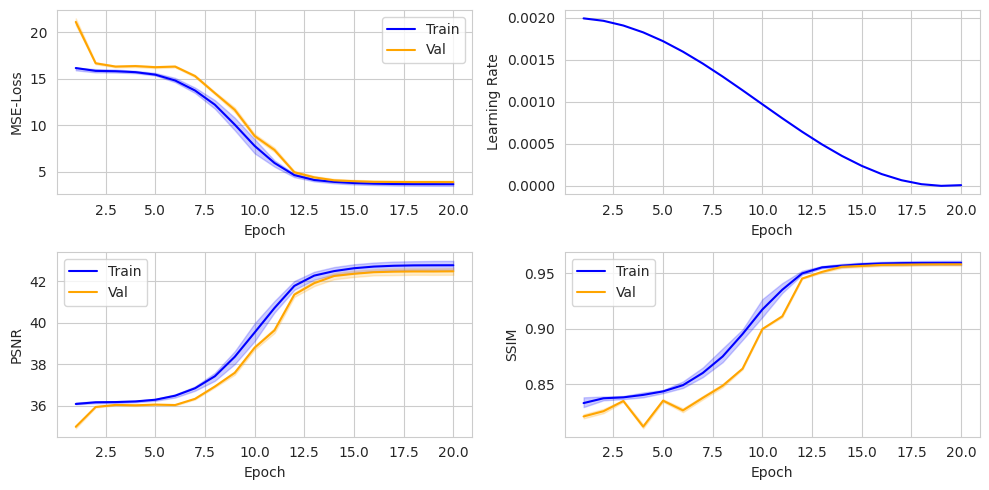

In [18]:
data_kwargs = dict(
    batch_size=15,
    images_folder_path='to_delete/ct_images',
    add_noise=lambda x: gaussian(x, var=20)
)

optimizer_kwargs = dict(
    lr=2e-3,
    weight_decay=1e-3
)

cnn = CnnTrainer(
    model_name='DnCNN',
    data_kwargs=data_kwargs,
    num_epochs=20,
    device='cuda',
    optimizer_kwargs=optimizer_kwargs,
    model_saving_path=None,
    val_size=0.2
)

cnn.fit(plot=True)

In [19]:
cnn.print_training_stats(2)

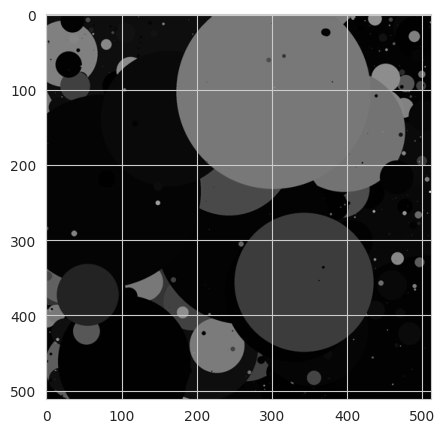

In [9]:
import matplotlib.pyplot as plt

loader = cnn.training_loader
# Alternatively, use iter() and next() to get the next batch
data_iter = iter(loader)
batch = next(data_iter)

data, target = batch[0][0], batch[1][0]

plt.figure(figsize=(5,5))
plt.imshow((target).cpu().numpy().squeeze(), cmap='grey')
plt.show()